In [10]:
import matplotlib.pyplot as plt
import torch

from datasets import load_dataset
from tqdm import tqdm

In [25]:
dataset = load_dataset(
    "ppak10/Melt-Pool-Thermal-Images",
    "masked",
    split = "data",
    num_proc=20
)
# dataset = load_dataset(
#     "ppak10/NIST-In-Situ-IN625-LPBF-Overhangs",
#     "frames",
#     split = "data",
# )

Generating data split: 100%|██████████| 706074/706074 [01:59<00:00, 5903.84 examples/s] 


In [26]:
torch_dataset = dataset.with_format("torch")
loader = torch.utils.data.DataLoader(torch_dataset, num_workers = 8, shuffle = True)

0it [00:00, ?it/s]

{'frame_index': tensor([958]), 'layer_number': tensor([376]), 'radiant_temp': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]]), 'scan_speed': tensor([800]), 'laser_power': tensor([195])}


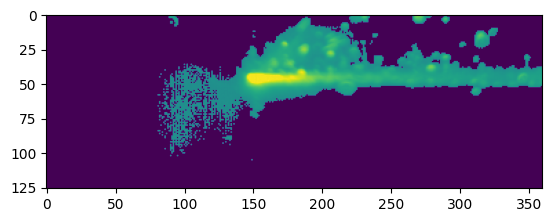

0it [00:03, ?it/s]


KeyError: 'masked_frame'

In [27]:
for i, row in tqdm(enumerate(loader)):
    if (i % 10000 == 0):
        print(row)
        plt.imshow(row["radiant_temp"].squeeze())
        plt.show()
        plt.imshow(row["masked_frame"].squeeze())
        plt.show()
        plt.imshow(row["target"].squeeze())
        plt.show()
    continue